# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#### READ DATA ####
path = r"parkinsons.csv"
data = pd.read_csv(path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# DEFINE DATA

In [5]:
#### define features and target ####
features=np.array( data.drop(columns=["name","status"],axis=1) ) # 22
target  =np.array( data["status"] )   # 1

print(features.shape)
print(target.shape)

#Get the count of each target (0 and 1) 
data['status'].value_counts()

(195, 22)
(195,)


1    147
0     48
Name: status, dtype: int64

# SHOWING DATA

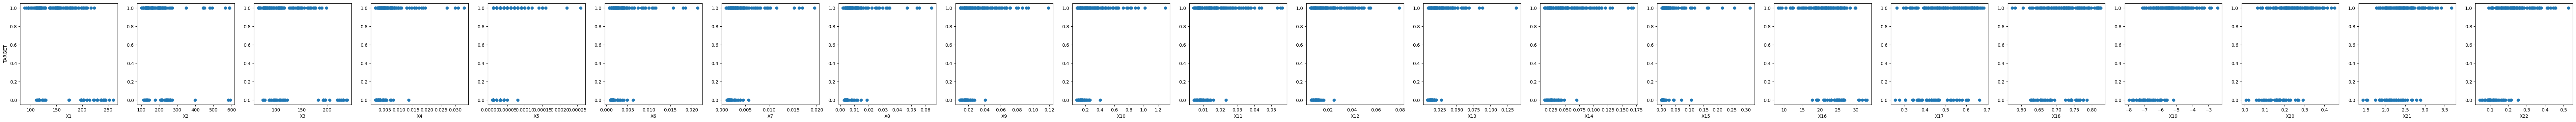

In [6]:
#### DATA SCATTER ####
fig,ax=plt.subplots(1, 22, figsize=(100, 4))

for i in range(len(ax)):
    ax[i].scatter(features[:,i],target)
    ax[i].set_xlabel(f"X{i+1}")
ax[0].set_ylabel("TARGET")
plt.show()

# Scalling The Data  

In [64]:
### Scale/normalize the features to between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
N_features=scaler.fit_transform(features)
N_target=target

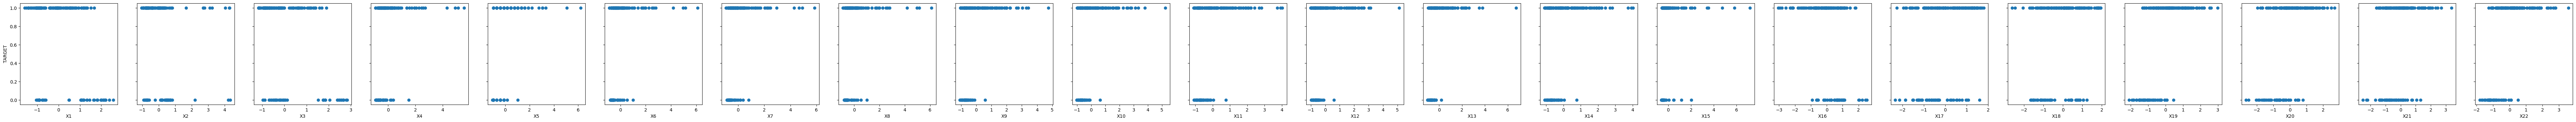

In [65]:
#### DATA SHOW After Normalization ####
fig,ax=plt.subplots(1, 22, figsize=(100, 4), sharex='col', sharey='row')

for i in range(len(ax)):
    ax[i].scatter(N_features[:,i],N_target)
    ax[i].set_xlabel(f"X{i+1}")
ax[0].set_ylabel("TARGET")
plt.show()

# ---------------------------------------------------------------------------------------

# SPLITTING DATA

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(N_features,target, test_size=0.3,shuffle=True)

# MAKE A MODEL TO PREDETION

# Logistic Regression

## MAKE A MODEL TO PREDETION

In [110]:
from sklearn.linear_model import LogisticRegression

LRModel=LogisticRegression()

LRModel.fit(x_train,y_train)

y_pred=LRModel.predict(x_test)

#Calculating Details

print('LogisticRegressionModel Train Score is : ' , round((LRModel.score(x_train,y_train)*100),2),'%')
print(f"LogisticRegressionModel Test Score Is : {round((LRModel.score(x_test,y_test)*100),2)} %")

LogisticRegressionModel Train Score is :  83.09 %
LogisticRegressionModel Test Score Is : 84.75 %


## Predect New Data

In [130]:
INPUT_DATA=(236.2,244.663,102.137,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,0.217,0.0141,0.01426,0.01621,0.04231,0.0062,24.078,0.469928,0.628232,-6.816086,0.17227,2.235197,0.119652) #0
INPUT_DATA_NP=np.asarray(INPUT_DATA)
INPUT_DATA_NP_RE=INPUT_DATA_NP.reshape(1,-1)
FINAL_DATA=scaler.transform(INPUT_DATA_NP_RE)

PREDICTION=LRModel.predict(FINAL_DATA)

In [131]:
if PREDICTION ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Negative , No Parkinson's Found


# ---------------------------------------------------------------------------------------

# SVC     1

## MAKE A MODEL TO PREDETION

In [122]:
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'linear',max_iter=1000,C=1.0,gamma='auto')

SVCModel.fit(x_train, y_train)

y_pred1  =SVCModel.predict(x_test)

#Calculating Details

print('SVCModel Train Score Is : ' ,round((SVCModel.score(x_train,y_train)*100),2),'%')
print(f"SVCModel Test Score Is : {round((SVCModel.score(x_test,y_test)*100),2)} %")

SVCModel Train Score Is :  88.24 %
SVCModel Test Score Is : 88.14 %


C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Predect New Data

In [128]:
INPUT_DATA1=(236.2,244.663,102.137,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,0.217,0.0141,0.01426,0.01621,0.04231,0.0062,24.078,0.469928,0.628232,-6.816086,0.17227,2.235197,0.119652)#0
INPUT_DATA_NP1=np.asarray(INPUT_DATA1)
INPUT_DATA_NP_RE1=INPUT_DATA_NP.reshape(1,-1)
FINAL_DATA1=scaler.transform(INPUT_DATA_NP_RE1)

PREDICTION1=SVCModel.predict(FINAL_DATA1)

In [129]:
if PREDICTION1 ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Negative , No Parkinson's Found


# ===================================================

# SCORE OF ERROR

In [125]:
from sklearn.metrics import zero_one_loss
#----------------------------------------------------
print('Logistic Regression')
Z_O_L = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', Z_O_L )
#----------------------------------------------------
print('\nSVC')

Z_O_L1 = zero_one_loss(y_test,y_pred1,normalize=False) 
print('Zero One Loss Value : ', Z_O_L1 )

Logistic Regression
Zero One Loss Value :  9

SVC
Zero One Loss Value :  7


Logistic Regression


<AxesSubplot: >

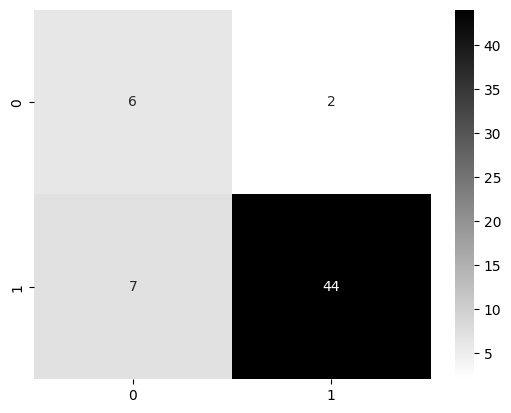

In [126]:
#Import Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
#----------------------------------------------------
print("Logistic Regression")
CM = confusion_matrix(y_test,y_pred) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'

SVC


<AxesSubplot: >

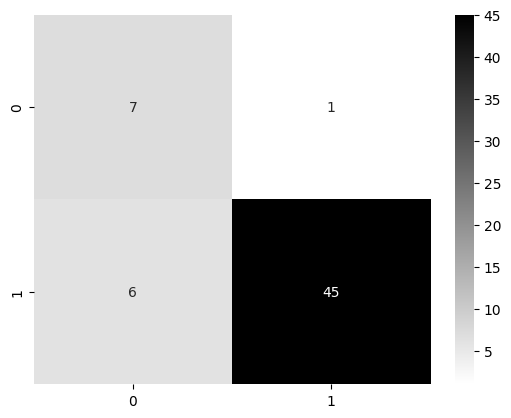

In [127]:
print("SVC")

CM = confusion_matrix(y_test,y_pred1) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'

# END